In [1]:
# importing the required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set_style("darkgrid")

In [2]:
# loading the dataset
df = pd.read_excel("energy_data.xlsx")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
# renaming column
column_names = {"X1": "Relative_Compactness", "X2": "Surface_Area", "X3": "Wall_Area", "X4": "Roof_Area",
               "X5": "Overall_Height", 
               "X6": "Orientation",
              "X7": "Glazing_Area",
               "X8": "Glazing_Area_Distribution", "Y1": "Heating_Load", "Y2": "Colling_Load"}

df = df.rename(columns=column_names)
df.head()
df.shape

(768, 10)

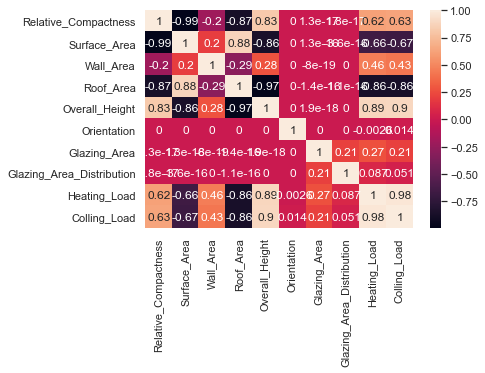

In [4]:
sns.heatmap(df.corr(), annot=True)

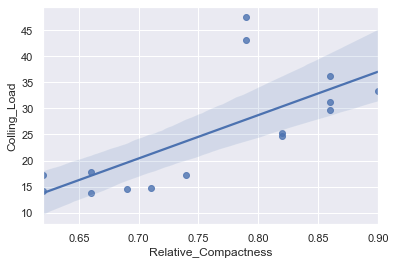

In [5]:
# select the sample of the dataset

simple_lin_reg_df = df[["Relative_Compactness", "Colling_Load"]].sample(15, random_state=2)

sns.regplot(x = "Relative_Compactness", y="Colling_Load", data=simple_lin_reg_df)

# Measuring regression performance 

##### Mean absolute error

In [6]:
# Firstly, we normalize our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalized_df.drop(columns=["Heating_Load", "Colling_Load"])
heating_target = normalized_df["Heating_Load"]

# now we split the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_df, heating_target, test_size=0.3, random_state=1)

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
# fit the model to the training dataset
linear_model.fit(X_train, y_train)
# obtain the prediction
predicted_value = linear_model.predict(X_test)

# MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_value)
round(mae, 3)

0.063

##### Residual Sum of Squares (RSS)

In [7]:
import numpy as np
rss = np.sum(np.square(y_test - predicted_value))
round(rss, 3)

1.817

###### Root Mean Square Error (RMSE)

In [8]:
from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(y_test, predicted_value))
round(rms, 3)

0.089

##### R-Squared

In [9]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_value)
round(r2_score, 3)

0.894

# Penalization Methods

##### Ridge regression

In [10]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

##### Feature Selection and Lasso Regression

In [11]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [12]:
# comparing the effect of regularization

def get_weight_df(model, feat, col_name):
    # this fuction returns the weight of every feature
    weight = pd.Series(model.coef_, feat.columns).sort_values()
    weight_df = pd.DataFrame(weight).reset_index()
    weight_df.columns = ["Features", col_name]
    weight_df[col_name].round(3)
    return weight_df

linear_model_weight = get_weight_df(linear_model, X_train, "Linear_Model_Weight")
ridge_weight_df = get_weight_df(ridge_reg, X_train, "Ridge_Weight")
lasso_weight_df = get_weight_df(lasso_reg, X_train, "Lasso_Weight")

final_weight = pd.merge(linear_model_weight, ridge_weight_df, on="Features")
final_weight = pd.merge(final_weight, lasso_weight_df, on="Features")

final_weight

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_Weight
0,Relative_Compactness,-0.606412,-0.283471,-0.027719
1,Roof_Area,-0.328099,-0.163192,-0.000000
2,Surface_Area,-0.235022,-0.062275,0.000000
3,Orientation,0.003399,0.003369,0.000000
4,Wall_Area,0.018947,0.103061,0.200087
5,Glazing_Area_Distribution,0.028452,0.029088,0.021431
6,Glazing_Area,0.215042,0.212449,0.206132
7,Overall_Height,0.393549,0.442467,0.463482


# Loading the quiz dataset

In [13]:
# importing the required library
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 12))
import seaborn as sns
sns.set(color_codes=True)

In [14]:
# loading the dataset
df1 = pd.read_csv('energydata_quiz.csv')
df1.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [15]:
df1.describe(include="all")

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
unique,19735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2016-03-12 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,NaN,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,NaN,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,NaN,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,NaN,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,NaN,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769


In [16]:
df1.duplicated().any()

False

In [17]:
df1.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [18]:
Feature_df1 = df1.drop(columns=["date", "lights"], axis=1)
Target_df1 = Feature_df1[["Appliances"]]

In [19]:
Feature_df1

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,60,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,50,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,50,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,60,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,90,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,270,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,420,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [20]:
Target_df1

,Appliances
0,60
1,60
2,50
3,50
4,60
...,...
19730,100
19731,90
19732,270
19733,420


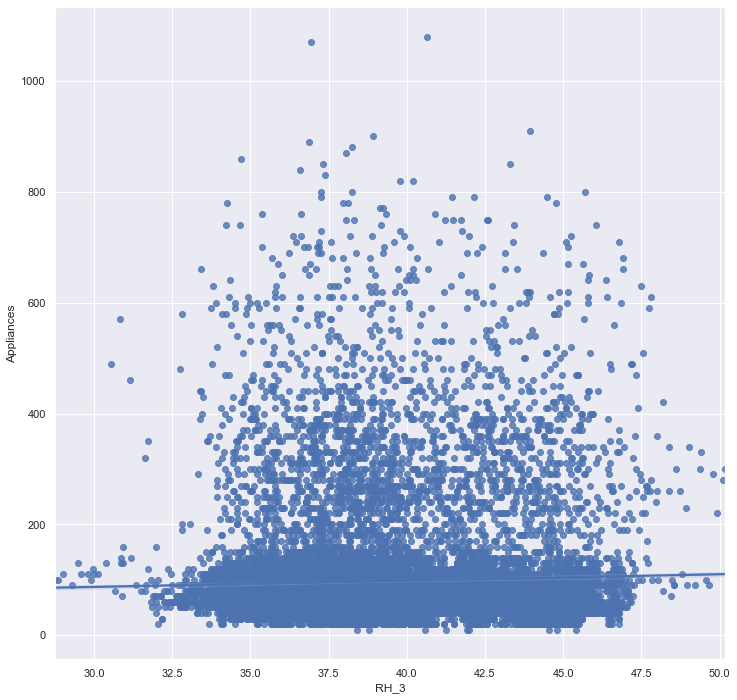

In [21]:
# select a sample of the dataset

sample_feature_df1 = Feature_df1[["RH_3", "Appliances"]].sample(15, random_state=42)
sns.regplot(x="RH_3", y="Appliances", data=Feature_df1)

In [22]:
# lets normalise the dataset to a common scale using the minmax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_df1 = pd.DataFrame(scaler.fit_transform(Feature_df1), columns=Feature_df1.columns)
feature_df1 = normalized_df1.drop(columns=["Appliances"])
appliances_target = normalized_df1["Appliances"]

# we now split our data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_df1, appliances_target, test_size=0.3, random_state=42)

# lets perform a regression model on the dataset
from sklearn.linear_model import LinearRegression
# we instantiate the linear regression
linear_reg = LinearRegression()
# we fit the model to a training dataset
linear_reg.fit(X_train, y_train)
# lets obtain the prediction
predicted_reg = linear_reg.predict(X_test)

# Measuring Regression Performance

In [31]:
# mean absolute error
from sklearn.metrics import mean_absolute_error
mae_reg = mean_absolute_error(y_test, predicted_reg)
round(mae_reg, 2)

0.05

In [32]:
# residual sum of squares (RSS)
import numpy as np
rss_reg = np.sum(np.square(y_test - predicted_reg))
round(rss_reg, 2)

45.35

In [34]:
# Root Mean Square Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse_reg = np.sqrt(mean_squared_error(y_test, predicted_reg))
round(rmse_reg, 3)

0.088

In [30]:
# R-Squared
from sklearn.metrics import r2_score
r2_reg = r2_score(y_test, predicted_reg)
round(r2_reg, 2)

0.15

# Penalization of the dataset

In [27]:
# Using Ridge
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [28]:
# Using Lasso
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [29]:
# Comparing the effect of both regularization
def get_weight_df1(model, feat, col_name):
    #this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df1 = pd.DataFrame(weights).reset_index()
    weights_df1.columns = ["Features", col_name]
    weights_df1[col_name].round(3)
    return weights_df1

linear_models_weights = get_weight_df1(linear_reg, X_train, "Linear_Model_Weight")
ridge_weight_df1 = get_weight_df1(ridge, X_train, "Ridge_Weight")
lasso_weight_df1 = get_weight_df1(lasso, X_train, "Lasso_Weight")

final_weights = pd.merge(linear_models_weights, ridge_weight_df1, on="Features")
final_weights = pd.merge(final_weights, lasso_weight_df1, on="Features")
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_Weight
0,RH_2,-0.456698,-0.401134,-0.000000
1,T_out,-0.321860,-0.250765,0.000000
2,T2,-0.236178,-0.193880,0.000000
3,T9,-0.189941,-0.188584,-0.000000
4,RH_8,-0.157595,-0.156596,-0.000110
5,RH_out,-0.077671,-0.050541,-0.049557
6,RH_7,-0.044614,-0.046291,-0.000000
7,RH_9,-0.039800,-0.041701,-0.000000
8,T5,-0.015657,-0.020727,-0.000000
9,T1,-0.003281,-0.021549,0.000000
